# PROJECT BRIEF

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry.

Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

# The Data

On the same MySQL instance from last week, in the schema `movies`, is some movie-related data from:
* Box Office Mojo
* IMDB
* Rotten Tomatoes
* TheMovieDB.org

# The Deliverables

There are three required deliverables for this project:

1. A well documented **Jupyter Notebook** containing any code you've written for this project and comments explaining it.
2. An organized **README.md** file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
3. A Github repository containing all of the above files and any additional files worth includding
4. [OPTIONAL] A short **slide deck** (delivered as a PDF export) giving a high-level overview of your methodology and recommendations for non-technical stakeholders. If you do this, make sure to also add and commit this pdf of your non-technical presentation to your repository with a file name of presentation.pdf.

### Jupyter Notebook Must-Haves

For this project, your Jupyter Notebook should meet the following specifications:

#### Organization/Code Cleanliness

* The notebook should be well organized, easy to follow,  and code should be commented where appropriate.  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code.  All functions have [docstrings](https://numpydoc.readthedocs.io/en/latest/format.html) that act as professional-quality documentation
* The notebook is written for technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.

#### Visualizations & EDA

* Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)  
* You pose at least 3 meaningful questions and answer them through EDA.  These questions should be well labeled and easy to identify inside the notebook.
    * **Level Up**: Each question is clearly answered with a visualization that makes the answer easy to understand.   
* Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.

# Our Questions To Answer

1. How has the popularity (reviews/ratings) of certain genres changed over time? Colm

2. Is there an optimal run time and does that vary by domestic vs. foreign? Josh

3. Who are the most succesful (movie ratings) writers, directors and producers? Josh

4. Is there a correlation between production budget and domestic/worldwide earnings?



In [402]:
#Import Packages and Connect To Database

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
%matplotlib inline

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')


In [330]:
# Get IMDB Tables

df_imdb_title_ratings= pd.read_sql_query("""
SELECT *
FROM imdb_title_ratings
;""", con)

df_imdb_title_ratings

OperationalError: MySQL Connection not available.

In [291]:
# Get IMDB Tables

df_imdb_title_basics= pd.read_sql_query("""
SELECT *
FROM imdb_title_basics
;""", con)

df_imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,


In [292]:
#Merged IMDB Tables / Cleaned Run-Time

imdb_title_combined = pd.merge(df_imdb_title_basics, df_imdb_title_ratings, how='inner', on='tconst')

imdb_title_combined = imdb_title_combined.dropna(axis=0, subset=['runtime_minutes']).sort_values('start_year')


In [293]:
# Selecting Genres

imdb_title_combined[imdb_title_combined['genres'].str.contains('Drama')]

#OPEN QUESTION - HOW DO WE PHARSE OUT THE GENRES?

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
9065,tt1745772,My Heart Is an Idiot,My Heart Is an Idiot,2010,98.0,"Documentary,Drama,Romance",8.2,10
6181,tt1640402,Belukar,Belukar,2010,96.0,"Action,Drama,Romance",6.9,9
6173,tt1640198,Lost Years,Verloren jaren,2010,70.0,Drama,7.0,46
6166,tt1640111,Secret Love,Bimilae,2010,111.0,Drama,6.0,288
6165,tt1639901,A Screaming Man,Un homme qui crie,2010,92.0,Drama,6.7,1370
...,...,...,...,...,...,...,...,...
38657,tt3679070,Milan Talkies,Milan Talkies,2019,141.0,Drama,4.7,62
71417,tt8669356,Joan of Arc,Jeanne,2019,137.0,Drama,5.4,23
71312,tt8647376,Vai,Vai,2019,90.0,Drama,8.0,26
580,tt10052290,Love and Mercy,Milosc i milosierdzie,2019,104.0,"Biography,Drama,Family",5.4,18


In [294]:
# Converting RunTime to INT

imdb_title_combined['runtime_minutes'] = imdb_title_combined['runtime_minutes'].astype(int)
imdb_title_combined

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
9065,tt1745772,My Heart Is an Idiot,My Heart Is an Idiot,2010,98,"Documentary,Drama,Romance",8.2,10
6181,tt1640402,Belukar,Belukar,2010,96,"Action,Drama,Romance",6.9,9
6180,tt1640401,Andartu terlampau... 21 hari mencari suami,Andartu terlampau... 21 hari mencari suami,2010,90,Comedy,7.2,6
6177,tt1640220,Mr. Hush,Mr. Hush,2010,85,Horror,2.2,370
14040,tt1950461,Women of the Future,Women of the Future,2010,16,"Biography,Documentary",8.0,7
...,...,...,...,...,...,...,...,...
580,tt10052290,Love and Mercy,Milosc i milosierdzie,2019,104,"Biography,Drama,Family",5.4,18
582,tt10055770,Vellai Pookal,Vellaipookal,2019,122,Thriller,7.6,380
38919,tt3699702,The Divorce Party,The Divorce Party,2019,93,"Comedy,Romance",5.0,265
71311,tt8647310,Buffaloed,Buffaloed,2019,95,"Comedy,Drama",7.6,18


In [232]:
df_rt_movie_info= pd.read_sql_query("""
SELECT *
FROM rt_movie_info
;""", con)

df_rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None


In [171]:
df_rt_reviews= pd.read_sql_query("""
SELECT *
FROM rt_movie_info
;""", con)

df_rt_reviews

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None


In [172]:
#Combining RT Tables

df_rt_combined = pd.merge(df_rt_movie_info,df_rt_reviews,how='inner',on='id')
df_rt_combined

,id,synopsis_x,rating_x,genre_x,director_x,writer_x,theater_date_x,dvd_date_x,currency_x,box_office_x,...,rating_y,genre_y,director_y,writer_y,theater_date_y,dvd_date_y,currency_y,box_office_y,runtime_y,studio_y
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,...,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",...,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,...,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,...,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None


In [173]:
#Clean RunTime Column

df_rt_combined['runtime'] = df_rt_combined['runtime_y'].str.split(" ").map(lambda x: x[0])

df_rt_combined['runtime'] = pd.to_numeric(df_rt_combined['runtime'])

df_rt_combined

,id,synopsis_x,rating_x,genre_x,director_x,writer_x,theater_date_x,dvd_date_x,currency_x,box_office_x,...,genre_y,director_y,writer_y,theater_date_y,dvd_date_y,currency_y,box_office_y,runtime_y,studio_y,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,...,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None,104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",...,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,108.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,...,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None,116.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,...,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None,128.0
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,...,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",...,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,106.0
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,...,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage,88.0
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,...,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None,111.0
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,...,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None,101.0


In [295]:
#Get TMDB Table

df_tmdb= pd.read_sql_query("""
SELECT *
FROM tmdb_movies
;""", con)

df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [234]:
#Convert Release_Date

df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [176]:
#Get BOM Table

df_bom= pd.read_sql_query("""
SELECT *
FROM bom_movie_gross
;""", con)

df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [177]:
#Create Worldwide Column

df_bom['foreign_gross'] = df_bom['foreign_gross'].fillna(0)

df_bom['worldwide_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross']
df_bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [403]:
#Get TN Table

df_tn= pd.read_sql_query("""
SELECT *
FROM tn_movie_budgets
;""", con)

df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [404]:
#Clean Columns

df_tn['release_date'] = pd.to_datetime(df_tn['release_date'])

df_tn['production_budget'] = df_tn['production_budget'].str.split('$').map(lambda x: x[1].replace(',','')).astype(int)
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.split('$').map(lambda x: x[1].replace(',','')).astype(int)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.split('$').map(lambda x: x[1].replace(',','')).astype(int)

df_tn.info()


# pd.to_numeric(df_tn['production_budget'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [400]:
#Add Foreign Column

df_tn['foreign_gross'] = df_tn['worldwide_gross'] - df_tn['domestic_gross']

df_tn.info()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [25]:
imdb_title_combined

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
9065,tt1745772,My Heart Is an Idiot,My Heart Is an Idiot,2010,98,"Documentary,Drama,Romance",8.2,10
6181,tt1640402,Belukar,Belukar,2010,96,"Action,Drama,Romance",6.9,9
6180,tt1640401,Andartu terlampau... 21 hari mencari suami,Andartu terlampau... 21 hari mencari suami,2010,90,Comedy,7.2,6
6177,tt1640220,Mr. Hush,Mr. Hush,2010,85,Horror,2.2,370
14040,tt1950461,Women of the Future,Women of the Future,2010,16,"Biography,Documentary",8.0,7
...,...,...,...,...,...,...,...,...
580,tt10052290,Love and Mercy,Milosc i milosierdzie,2019,104,"Biography,Drama,Family",5.4,18
582,tt10055770,Vellai Pookal,Vellaipookal,2019,122,Thriller,7.6,380
38919,tt3699702,The Divorce Party,The Divorce Party,2019,93,"Comedy,Romance",5.0,265
71311,tt8647310,Buffaloed,Buffaloed,2019,95,"Comedy,Drama",7.6,18


In [27]:
imdb_title_combined


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
9065,tt1745772,My Heart Is an Idiot,My Heart Is an Idiot,2010,98,"Documentary,Drama,Romance",8.2,10
6181,tt1640402,Belukar,Belukar,2010,96,"Action,Drama,Romance",6.9,9
6180,tt1640401,Andartu terlampau... 21 hari mencari suami,Andartu terlampau... 21 hari mencari suami,2010,90,Comedy,7.2,6
6177,tt1640220,Mr. Hush,Mr. Hush,2010,85,Horror,2.2,370
14040,tt1950461,Women of the Future,Women of the Future,2010,16,"Biography,Documentary",8.0,7
...,...,...,...,...,...,...,...,...
580,tt10052290,Love and Mercy,Milosc i milosierdzie,2019,104,"Biography,Drama,Family",5.4,18
582,tt10055770,Vellai Pookal,Vellaipookal,2019,122,Thriller,7.6,380
38919,tt3699702,The Divorce Party,The Divorce Party,2019,93,"Comedy,Romance",5.0,265
71311,tt8647310,Buffaloed,Buffaloed,2019,95,"Comedy,Drama",7.6,18


In [28]:

full_list = imdb_title_combined['genres'].str.split(',').apply(frozenset).to_frame(name='genres')

for genres in frozenset.union(*full_list.genres):
    full_list[genres] = full_list.apply(lambda x: int(genres in x.genres), axis=1)

full_list

,genres,Family,Documentary,,Musical,Adult,Crime,Fantasy,Biography,Western,...,News,Game-Show,Short,Horror,Mystery,Sci-Fi,Sport,Action,Thriller,Reality-TV
9065,"(Documentary, Romance, Drama)",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6181,"(Action, Romance, Drama)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6180,(Comedy),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6177,(Horror),0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14040,"(Documentary, Biography)",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,"(Family, Biography, Drama)",1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
582,(Thriller),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38919,"(Romance, Comedy)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71311,"(Comedy, Drama)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Get TN Table

df_rt_imdb_link= pd.read_sql_query("""
SELECT *
FROM rt_imdb_link
ORDER BY rtid ASC
LIMIT 20
;""", con)

df_rt_imdb_link

,imdbid,rtid,title,year,mpaa_rating,runtime
0,121766,9,Star Wars: Episode III - Revenge of the Sith 3D,2005,PG-13,140
1,369735,10,Monster-in-Law,2005,PG-13,102
2,384642,11,Kicking & Screaming,2005,PG,94
3,375679,12,Crash,2004,R,113
4,342258,13,Unleashed (Danny the Dog),2005,R,102
5,320661,14,Kingdom of Heaven,2005,R,145
6,397065,15,House of Wax,2005,R,113
7,373926,16,The Interpreter,2005,PG-13,129
8,297284,18,Mindhunters,2005,R,106
9,329774,19,xXx: State of the Union,2005,R,101


In [30]:
df_rt= pd.read_sql_query("""
SELECT *
FROM rt_movie_info
ORDER BY id
LIMIT 20
;""", con)

df_rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",,,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,None
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",,,108 minutes,None


In [31]:
full_list = imdb_title_combined['genres'].str.split(',').apply(frozenset).to_frame(name='genres')
for genres in frozenset.union(*full_list.genres):
    full_list[genres] = full_list.apply(lambda _: int(genres in _.genres), axis=1)
full_list

,genres,Family,Documentary,,Musical,Adult,Crime,Fantasy,Biography,Western,...,News,Game-Show,Short,Horror,Mystery,Sci-Fi,Sport,Action,Thriller,Reality-TV
9065,"(Documentary, Romance, Drama)",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6181,"(Action, Romance, Drama)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6180,(Comedy),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6177,(Horror),0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14040,"(Documentary, Biography)",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,"(Family, Biography, Drama)",1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
582,(Thriller),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38919,"(Romance, Comedy)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71311,"(Comedy, Drama)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
df_imdb_tmdb= pd.read_sql_query("""
SELECT *
FROM tmdb_imdb_link
;""", con)

df_imdb_tmdb

,imdb_id,tmdb_id
0,1,16612
1,3,88013
2,7,159895
3,8,105158
4,10,774
...,...,...
62418,11057912,636593
62419,11101550,640427
62420,11108064,642749
62421,11168100,642203


In [333]:
df_imdb_tmdb

,imdb_id,tmdb_id
0,1,16612
1,3,88013
2,7,159895
3,8,105158
4,10,774
...,...,...
62418,11057912,636593
62419,11101550,640427
62420,11108064,642749
62421,11168100,642203


In [296]:
#Clean IMDB IDs

imdb_title_combined['tconst'] = imdb_title_combined['tconst'].str.lstrip('tt')

imdb_title_combined = imdb_title_combined.rename(columns={'tconst': 'imdb_id'})

imdb_title_combined['imdb_id'] = imdb_title_combined['imdb_id'].astype(int)

#Clean TMDB IDs

df_tmdb = df_tmdb.rename(columns={'id': 'tmdb_id'})

#Merge

connected_imdb_tmdb = pd.merge(imdb_title_combined, df_imdb_tmdb, how='inner', on='imdb_id')

master_imdb_tmdb = pd.merge(connected_imdb_tmdb, df_tmdb, how='inner', on='tmdb_id')

master_imdb_tmdb = master_imdb_tmdb.rename(columns={'averagerating': 'averagerating_imdb', 'vote_average': 'vote_average_tmdb'})

master_imdb_tmdb

,imdb_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating_imdb,numvotes,tmdb_id,genre_ids,original_language,original_title_y,popularity,release_date,title,vote_average_tmdb,vote_count
0,1640220,Mr. Hush,Mr. Hush,2010,85,Horror,2.2,370,123389,849,en,Mr. Hush,2.042,2010-08-01,Mr. Hush,2.3,7
1,1639901,A Screaming Man,Un homme qui crie,2010,92,Drama,6.7,1370,57602,789,fr,Un homme qui crie,2.211,2010-09-28,A Screaming Man,6.1,10
2,1639426,Udaan,Udaan,2010,134,Drama,8.2,38827,45316,417,hi,उड़ान,5.376,2010-06-17,Udaan,7.2,83
3,1640680,Armadillo,Armadillo,2010,105,"Documentary,War",7.5,8906,37828,3023,da,Armadillo,4.631,2011-04-15,Armadillo,7.2,61
4,1641638,The Legend Is Born: Ip Man,Yip Man chin chyun,2010,100,"Action,Biography,Drama",7.1,29529,44249,928,cn,葉問前傳,1.832,2010-06-24,The Legend Is Born: Ip Man,6.7,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,6921996,Johnny English Strikes Again,Johnny English Strikes Again,2018,89,"Action,Adventure,Comedy",6.2,46932,463272,23860,en,Johnny English Strikes Again,25.478,2018-10-26,Johnny English Strikes Again,6.2,1035
10431,2837574,The Old Man & the Gun,The Old Man & the Gun,2018,93,"Biography,Comedy,Crime",6.8,25902,429203,24004,en,The Old Man & the Gun,14.001,2018-09-28,The Old Man & the Gun,6.5,306
10432,5104604,Isle of Dogs,Isle of Dogs,2018,101,"Adventure,Animation,Comedy",7.9,108245,399174,23934,en,Isle of Dogs,16.954,2018-03-23,Isle of Dogs,7.9,1942
10433,6921496,A Bluebird in My Heart,A Bluebird in My Heart,2018,85,Drama,5.5,149,478308,25039,en,A Bluebird in My Heart,3.172,2018-03-10,A Bluebird in My Heart,7.6,9


In [297]:
master_imdb_tmdb = master_imdb_tmdb.rename_axis('master_id')



In [298]:
full_list = master_imdb_tmdb['genres'].str.split(',').apply(frozenset).to_frame(name='genres')
for genres in frozenset.union(*full_list.genres):
    full_list[genres] = full_list.apply(lambda _: int(genres in _.genres), axis=1)
full_list

,genres,,Mystery,Comedy,Crime,Horror,Fantasy,News,Game-Show,Sport,...,History,Sci-Fi,Family,Western,Documentary,Animation,Musical,Action,Thriller,Adventure
master_id,,,,,,,,,,,,,,,,,,,,,
0,(Horror),0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,(Drama),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,(Drama),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(War, Documentary)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"(Drama, Action, Biography)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,"(Action, Adventure, Comedy)",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10431,"(Biography, Crime, Comedy)",0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10432,"(Adventure, Comedy, Animation)",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [299]:
master_imdb_tmdb = pd.merge(master_imdb_tmdb, full_list,how='left', on='master_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 10434
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_id             10435 non-null  int64  
 1   primary_title       10435 non-null  object 
 2   original_title_x    10435 non-null  object 
 3   start_year          10435 non-null  int64  
 4   runtime_minutes     10435 non-null  int64  
 5   genres_x            10435 non-null  object 
 6   averagerating_imdb  10435 non-null  float64
 7   numvotes            10435 non-null  int64  
 8   tmdb_id             10435 non-null  int64  
 9   genre_ids           10435 non-null  object 
 10  original_language   10435 non-null  object 
 11  original_title_y    10435 non-null  object 
 12  popularity          10435 non-null  float64
 13  release_date        10435 non-null  object 
 14  title               10435 non-null  object 
 15  vote_average_tmdb   10435 non-null  float64
 16  vote

In [393]:
genre_names = full_list.columns
genre_names = list(genre_names[2:26])

genre_names

['Mystery',
 'Comedy',
 'Crime',
 'Horror',
 'Fantasy',
 'News',
 'Game-Show',
 'Sport',
 'Music',
 'War',
 'Biography',
 'Drama',
 'Reality-TV',
 'Romance',
 'History',
 'Sci-Fi',
 'Family',
 'Western',
 'Documentary',
 'Animation',
 'Musical',
 'Action',
 'Thriller',
 'Adventure']

In [395]:
#IMDB AVERAGES

genre_imdbscore_averages = []

for i in genre_names:
    holder = master_imdb_tmdb.loc[master_imdb_tmdb[i] == 1]
    genre_imdbscore_averages.append(holder['averagerating_imdb'].mean())
    [(a,b), (c,d)]

genre_imdbscore_averages

[5.649456521739132,
 5.839372325249657,
 6.012186689714777,
 4.8745794392523365,
 5.799385245901641,
 7.260294117647062,
 5.6,
 6.701826484018268,
 6.758011049723757,
 6.36,
 6.959811985898939,
 6.16523132385339,
 4.8,
 6.095699831365927,
 6.859367945823922,
 5.351433121019111,
 5.90571428571428,
 5.594871794871797,
 7.095865921787714,
 6.498670212765953,
 6.0984848484848495,
 5.641634491634514,
 5.314035087719314,
 6.029038652130833]

[Text(0.5, 0, 'Average IMDB Rating')]

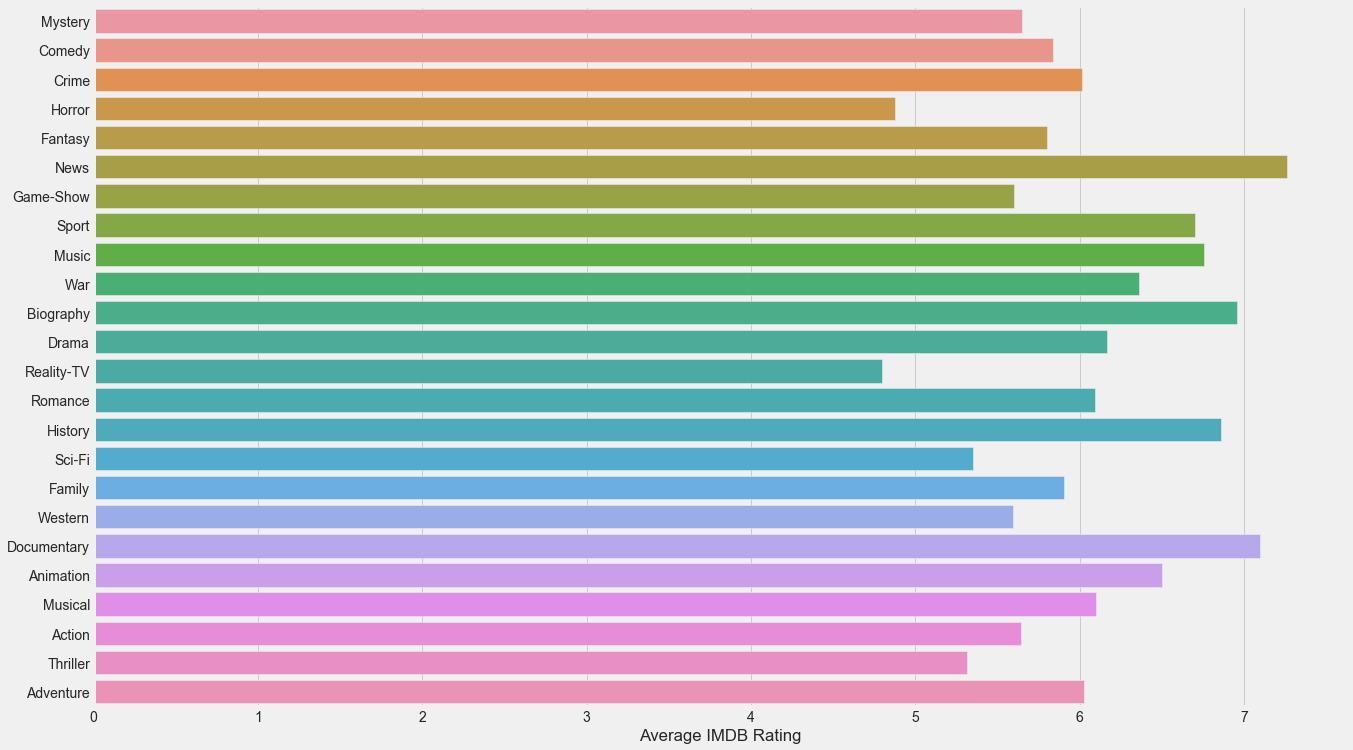

In [389]:
f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.set_color_codes("muted")
sns.barplot(genre_imdbscore_averages,genre_names)
ax.set(xlabel='Average IMDB Rating')

In [397]:
#POPULARITY SCORE

genre_popularity_averages = []

for i in genre_names:
    holder = master_imdb_tmdb.loc[master_imdb_tmdb[i] == 1]
    genre_popularity_averages.append(holder['popularity'].mean())

genre_popularity_averages

[6.909763586956514,
 5.977427603423671,
 7.1555522904062325,
 5.3542747663551555,
 8.895543032786883,
 1.6925441176470588,
 6.948,
 4.111461187214612,
 4.32840055248619,
 5.210319999999998,
 5.461092831962392,
 5.718091327859004,
 0.697,
 5.805974704890392,
 4.68945823927765,
 8.092496815286623,
 5.5356523809523805,
 5.150628205128207,
 2.0628709497206614,
 9.548385638297878,
 4.829530303030303,
 9.37750514800514,
 6.023235745614046,
 10.835059464816634]

[Text(0.5, 0, 'Average TMDB Popularity Rating')]

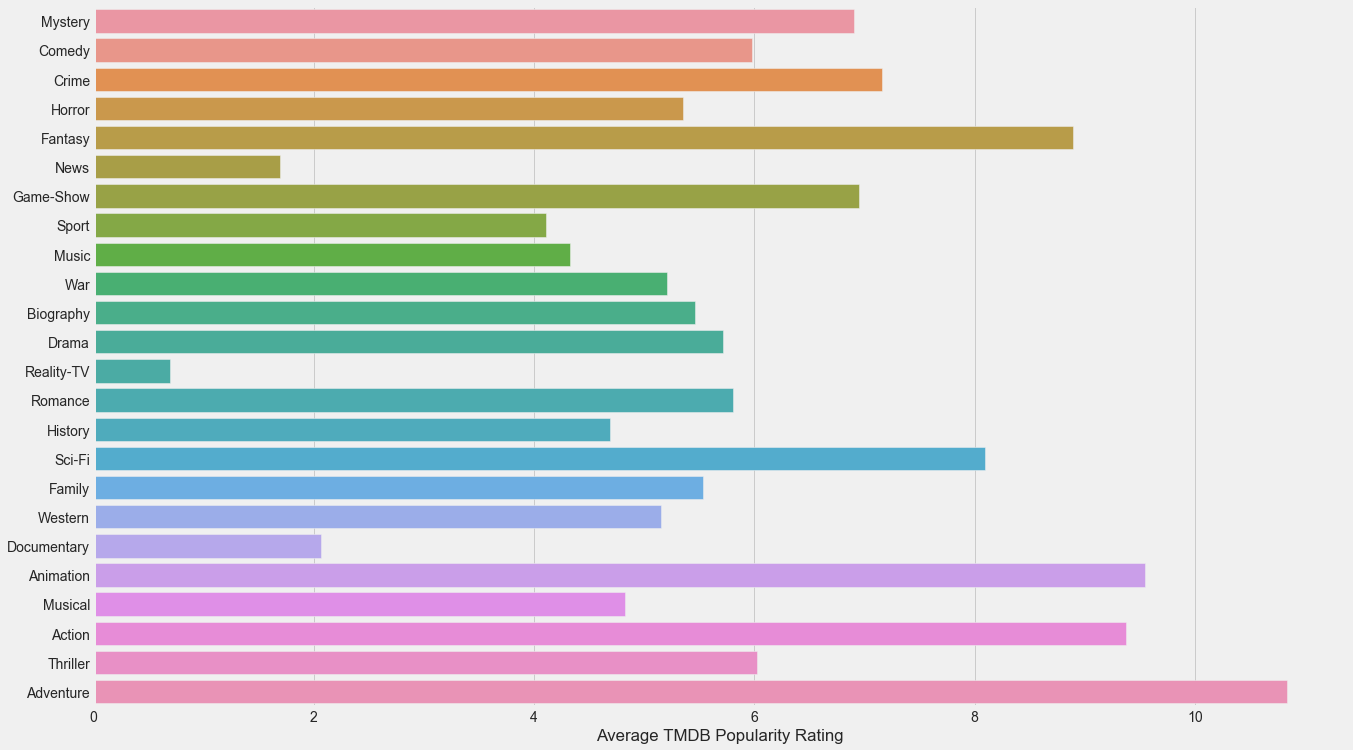

In [399]:
f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.set_color_codes("muted")
sns.barplot(genre_popularity_averages,genre_names)
ax.set(xlabel='Average TMDB Popularity Rating')



In [405]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


In [408]:
test_combo = pd.merge(master_imdb_tmdb, df_tn, how='inner', left_on = 'primary_title', right_on = 'movie')
test_combo

,imdb_id,primary_title,original_title_x,start_year,runtime_minutes,genres_x,averagerating_imdb,numvotes,tmdb_id,genre_ids,...,Musical,Action,Thriller,Adventure,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1645089,Inside Job,Inside Job,2010,109,"Crime,Documentary",8.3,65304,44639,152,...,0,0,0,0,17,2010-10-08,Inside Job,2000000,4311834,7799257
1,1666186,Vampires Suck,Vampires Suck,2010,82,Comedy,3.4,43984,40264,179,...,0,0,0,0,49,2010-08-18,Vampires Suck,20000000,36661504,81424988
2,1663628,Christmas Mail,Christmas Mail,2010,89,"Comedy,Drama,Family",5.8,1317,76706,521,...,0,0,0,0,45,2010-12-31,Christmas Mail,2500000,0,0
3,1571724,Honey,Bal,2010,103,Drama,7.2,6221,44160,3362,...,0,0,0,0,92,2003-12-05,Honey,18000000,30272254,62646763
4,1570989,Tiny Furniture,Tiny Furniture,2010,98,"Comedy,Drama,Romance",6.2,13397,47607,326,...,0,0,0,0,18,2010-11-12,Tiny Furniture,50000,391674,424149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,7014006,Eighth Grade,Eighth Grade,2018,93,"Comedy,Drama",7.5,43256,489925,23986,...,0,0,0,0,95,2018-07-13,Eighth Grade,2000000,13539710,14341016
1916,2328900,Mary Queen of Scots,Mary Queen of Scots,2018,124,"Biography,Drama,History",6.3,23866,457136,23956,...,0,0,0,0,60,2018-12-07,Mary Queen of Scots,25000000,16468499,46734733
1917,6998518,Mandy,Mandy,2018,121,"Action,Fantasy,Horror",6.6,44378,460885,23952,...,0,1,0,0,71,2018-09-14,Mandy,6000000,1214525,1427656
1918,2854926,Tag,Tag,2018,100,Comedy,6.5,85186,455980,23914,...,0,0,0,0,50,2018-06-15,Tag,28000000,54730625,77026186


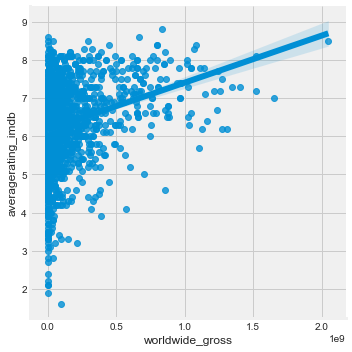

In [411]:
sns.lmplot('worldwide_gross','averagerating_imdb', test_combo)

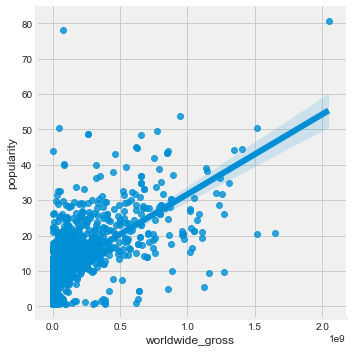

In [412]:
sns.lmplot('worldwide_gross','popularity', test_combo)